In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64


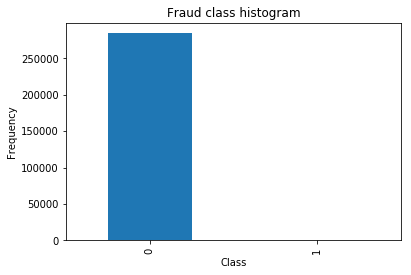

In [3]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
print(count_classes)
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [6]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [7]:
from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.2
                                                                                                   ,random_state = 42)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  227845
Number transactions test dataset:  56962
Total number of transactions:  284807

Number transactions train dataset:  787
Number transactions test dataset:  197
Total number of transactions:  984


C:\Users\divanshu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Logistic regression classifier

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [9]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [10]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.879746835443038
Iteration  2 : recall score =  0.9177215189873418
Iteration  3 : recall score =  0.89171974522293
Iteration  4 : recall score =  0.8152866242038217
Iteration  5 : recall score =  0.8726114649681529

Mean recall score  0.8754172377650569

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.9177215189873418
Iteration  2 : recall score =  0.9746835443037974
Iteration  3 : recall score =  0.9235668789808917
Iteration  4 : recall score =  0.9554140127388535
Iteration  5 : recall score =  0.9044585987261147

Mean recall score  0.9351689107473998

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.9240506329113924
Iteration  2 : recall score =  0.9620253164556962
Ite

In [11]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9191919191919192


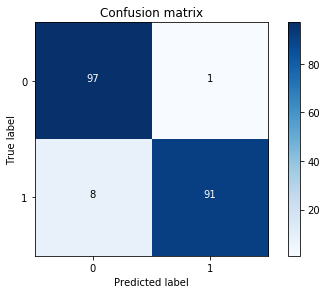

In [12]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.9285714285714286


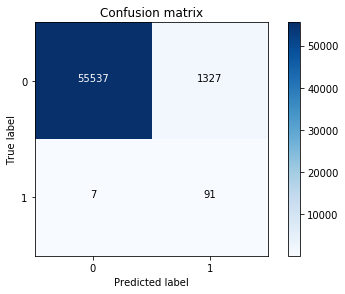

In [13]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

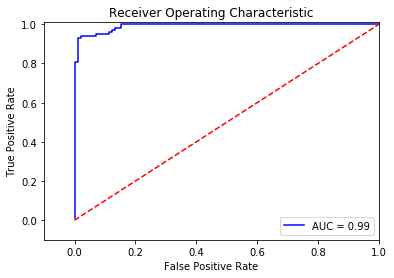

In [14]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.9993197129627598
Iteration  2 : recall score =  0.9990783207882552
Iteration  3 : recall score =  0.9991441550176655
Iteration  4 : recall score =  0.9989247075862977
Iteration  5 : recall score =  0.999100265531392

Mean recall score  0.9991134323772741

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.9993197129627598
Iteration  2 : recall score =  0.9990783207882552
Iteration  3 : recall score =  0.9992099892470758
Iteration  4 : recall score =  0.9990783207882552
Iteration  5 : recall score =  0.999188044503939

Mean recall score  0.9991748776580571

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.9993416577058966
Iteration  2 : recall score =  0.999100265531392
Ite

Recall metric in the testing dataset:  0.5816326530612245


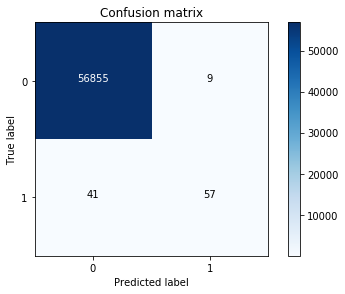

In [16]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9595959595959596
Recall metric in the testing dataset:  0.9090909090909091
Recall metric in the testing dataset:  0.8888888888888888
Recall metric in the testing dataset:  0.8282828282828283
Recall metric in the testing dataset:  0.8181818181818182
Recall metric in the testing dataset:  0.6060606060606061


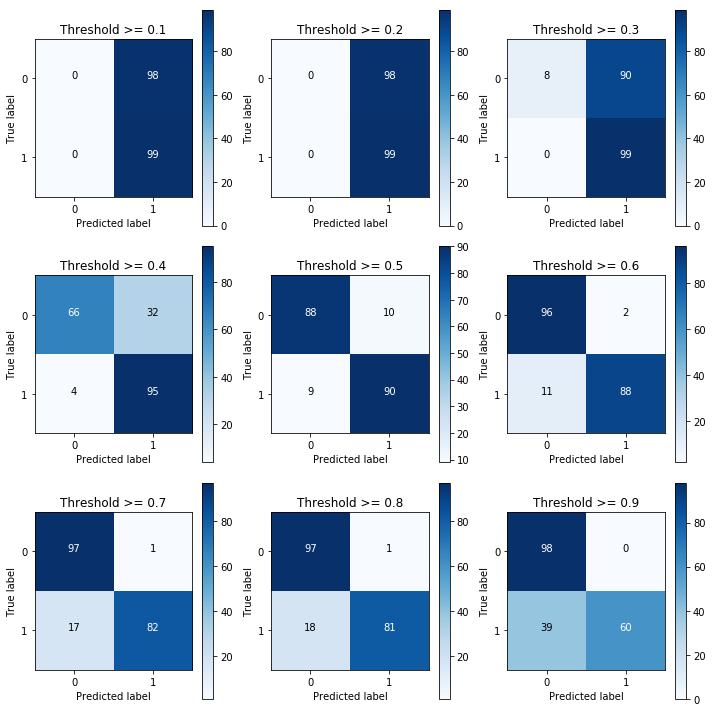

In [17]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
plt.show()

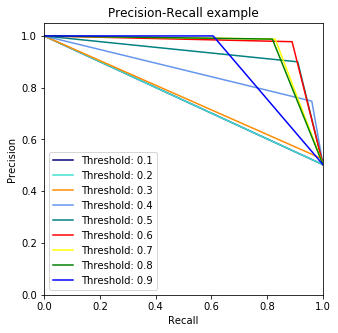

In [18]:
from itertools import cycle

lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")
plt.show()

# SVM 

In [19]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
import matplotlib.pyplot as plt 

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

Cross Validation within Train Dataset

In [21]:
# res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
# print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
# print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

In [22]:
# y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

In [23]:
# confusion_matrix(y_train, y_train_pred)

In [24]:
# print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
#                                                            y_train_pred, 
#                                                            average='weighted')))
# print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
#                                                      y_train_pred, 
#                                                      average='weighted')))
# print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
#                                              y_train_pred, 
#                                              average='weighted')))

Cross Validation within Test Dataset

In [25]:
# y_test_pred = cross_val_predict(clf, X_test, y_test, cv=3)

In [26]:
# confusion_matrix(y_test, y_test_pred)

In [27]:
# print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
#                                                            y_test_pred, 
#                                                            average='weighted')))
# print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
#                                                      y_test_pred, 
#                                                      average='weighted')))
# print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
#                                              y_test_pred, 
#                                              average='weighted')))

# Stochastic Gradient Descent

In [30]:
from sklearn.linear_model.stochastic_gradient import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train.values.ravel())

C:\Users\divanshu\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

Cross Validation within Train Dataset

In [31]:
# res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
# print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
# print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

In [32]:
# y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

In [33]:
# confusion_matrix(y_train, y_train_pred)

In [34]:
# print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
#                                                            y_train_pred, 
#                                                            average='weighted')))
# print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
#                                                      y_train_pred, 
#                                                      average='weighted')))
# print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
#                                              y_train_pred, 
#                                              average='weighted')))

Cross Validation within Test Dataset

In [35]:
# y_test_pred = cross_val_predict(clf, X_test, y_test, cv=3)

# confusion_matrix(y_test, y_test_pred)

# print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
#                                                            y_test_pred, 
#                                                            average='weighted')))
# print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
#                                                      y_test_pred, 
#                                                      average='weighted')))
# print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
#                                              y_test_pred, 
#                                              average='weighted')))

# Nearest Neighbors

In [37]:
from sklearn import neighbors
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train.values.ravel())

C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

Cross Validation within Train Dataset

In [38]:
# res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
# print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
# print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

# y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

# confusion_matrix(y_train, y_train_pred)

# print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
#                                                            y_train_pred, 
#                                                            average='weighted')))
# print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
#                                                      y_train_pred, 
#                                                      average='weighted')))
# print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
#                                              y_train_pred, 
#                                              average='weighted')))

Cross Validation within Test Dataset

In [39]:
# y_test_pred = cross_val_predict(clf, X_test, y_test, cv=3)

# confusion_matrix(y_test, y_test_pred)

# print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
#                                                            y_test_pred, 
#                                                            average='weighted')))
# print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
#                                                      y_test_pred, 
#                                                      average='weighted')))
# print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
#                                              y_test_pred, 
#                                              average='weighted')))

# Naive Bayes(Gaussian)

In [40]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train.values.ravel())

GaussianNB(priors=None)

Cross Validation within Train Dataset

In [41]:
# res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
# print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
# print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

# y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

# confusion_matrix(y_train, y_train_pred)

# print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
#                                                            y_train_pred, 
#                                                            average='weighted')))
# print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
#                                                      y_train_pred, 
#                                                      average='weighted')))
# print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
#                                              y_train_pred, 
#                                              average='weighted')))

Cross Validation within Test Dataset

In [42]:
# y_test_pred = cross_val_predict(clf, X_test, y_test, cv=3)

# confusion_matrix(y_test, y_test_pred)

# print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
#                                                            y_test_pred, 
#                                                            average='weighted')))
# print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
#                                                      y_test_pred, 
#                                                      average='weighted')))
# print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
#                                              y_test_pred, 
#                                              average='weighted')))

# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Cross Validation within Train Dataset

In [44]:
# res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
# print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
# print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

# y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

# confusion_matrix(y_train, y_train_pred)

# print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
#                                                            y_train_pred, 
#                                                            average='weighted')))
# print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
#                                                      y_train_pred, 
#                                                      average='weighted')))
# print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
#                                              y_train_pred, 
#                                              average='weighted')))

Cross Validation within Test Dataset

In [45]:
# y_test_pred = cross_val_predict(clf, X_test, y_test, cv=3)

# confusion_matrix(y_test, y_test_pred)

# print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
#                                                            y_test_pred, 
#                                                            average='weighted')))
# print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
#                                                      y_test_pred, 
#                                                      average='weighted')))
# print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
#                                              y_test_pred, 
#                                              average='weighted')))